In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats("retina")

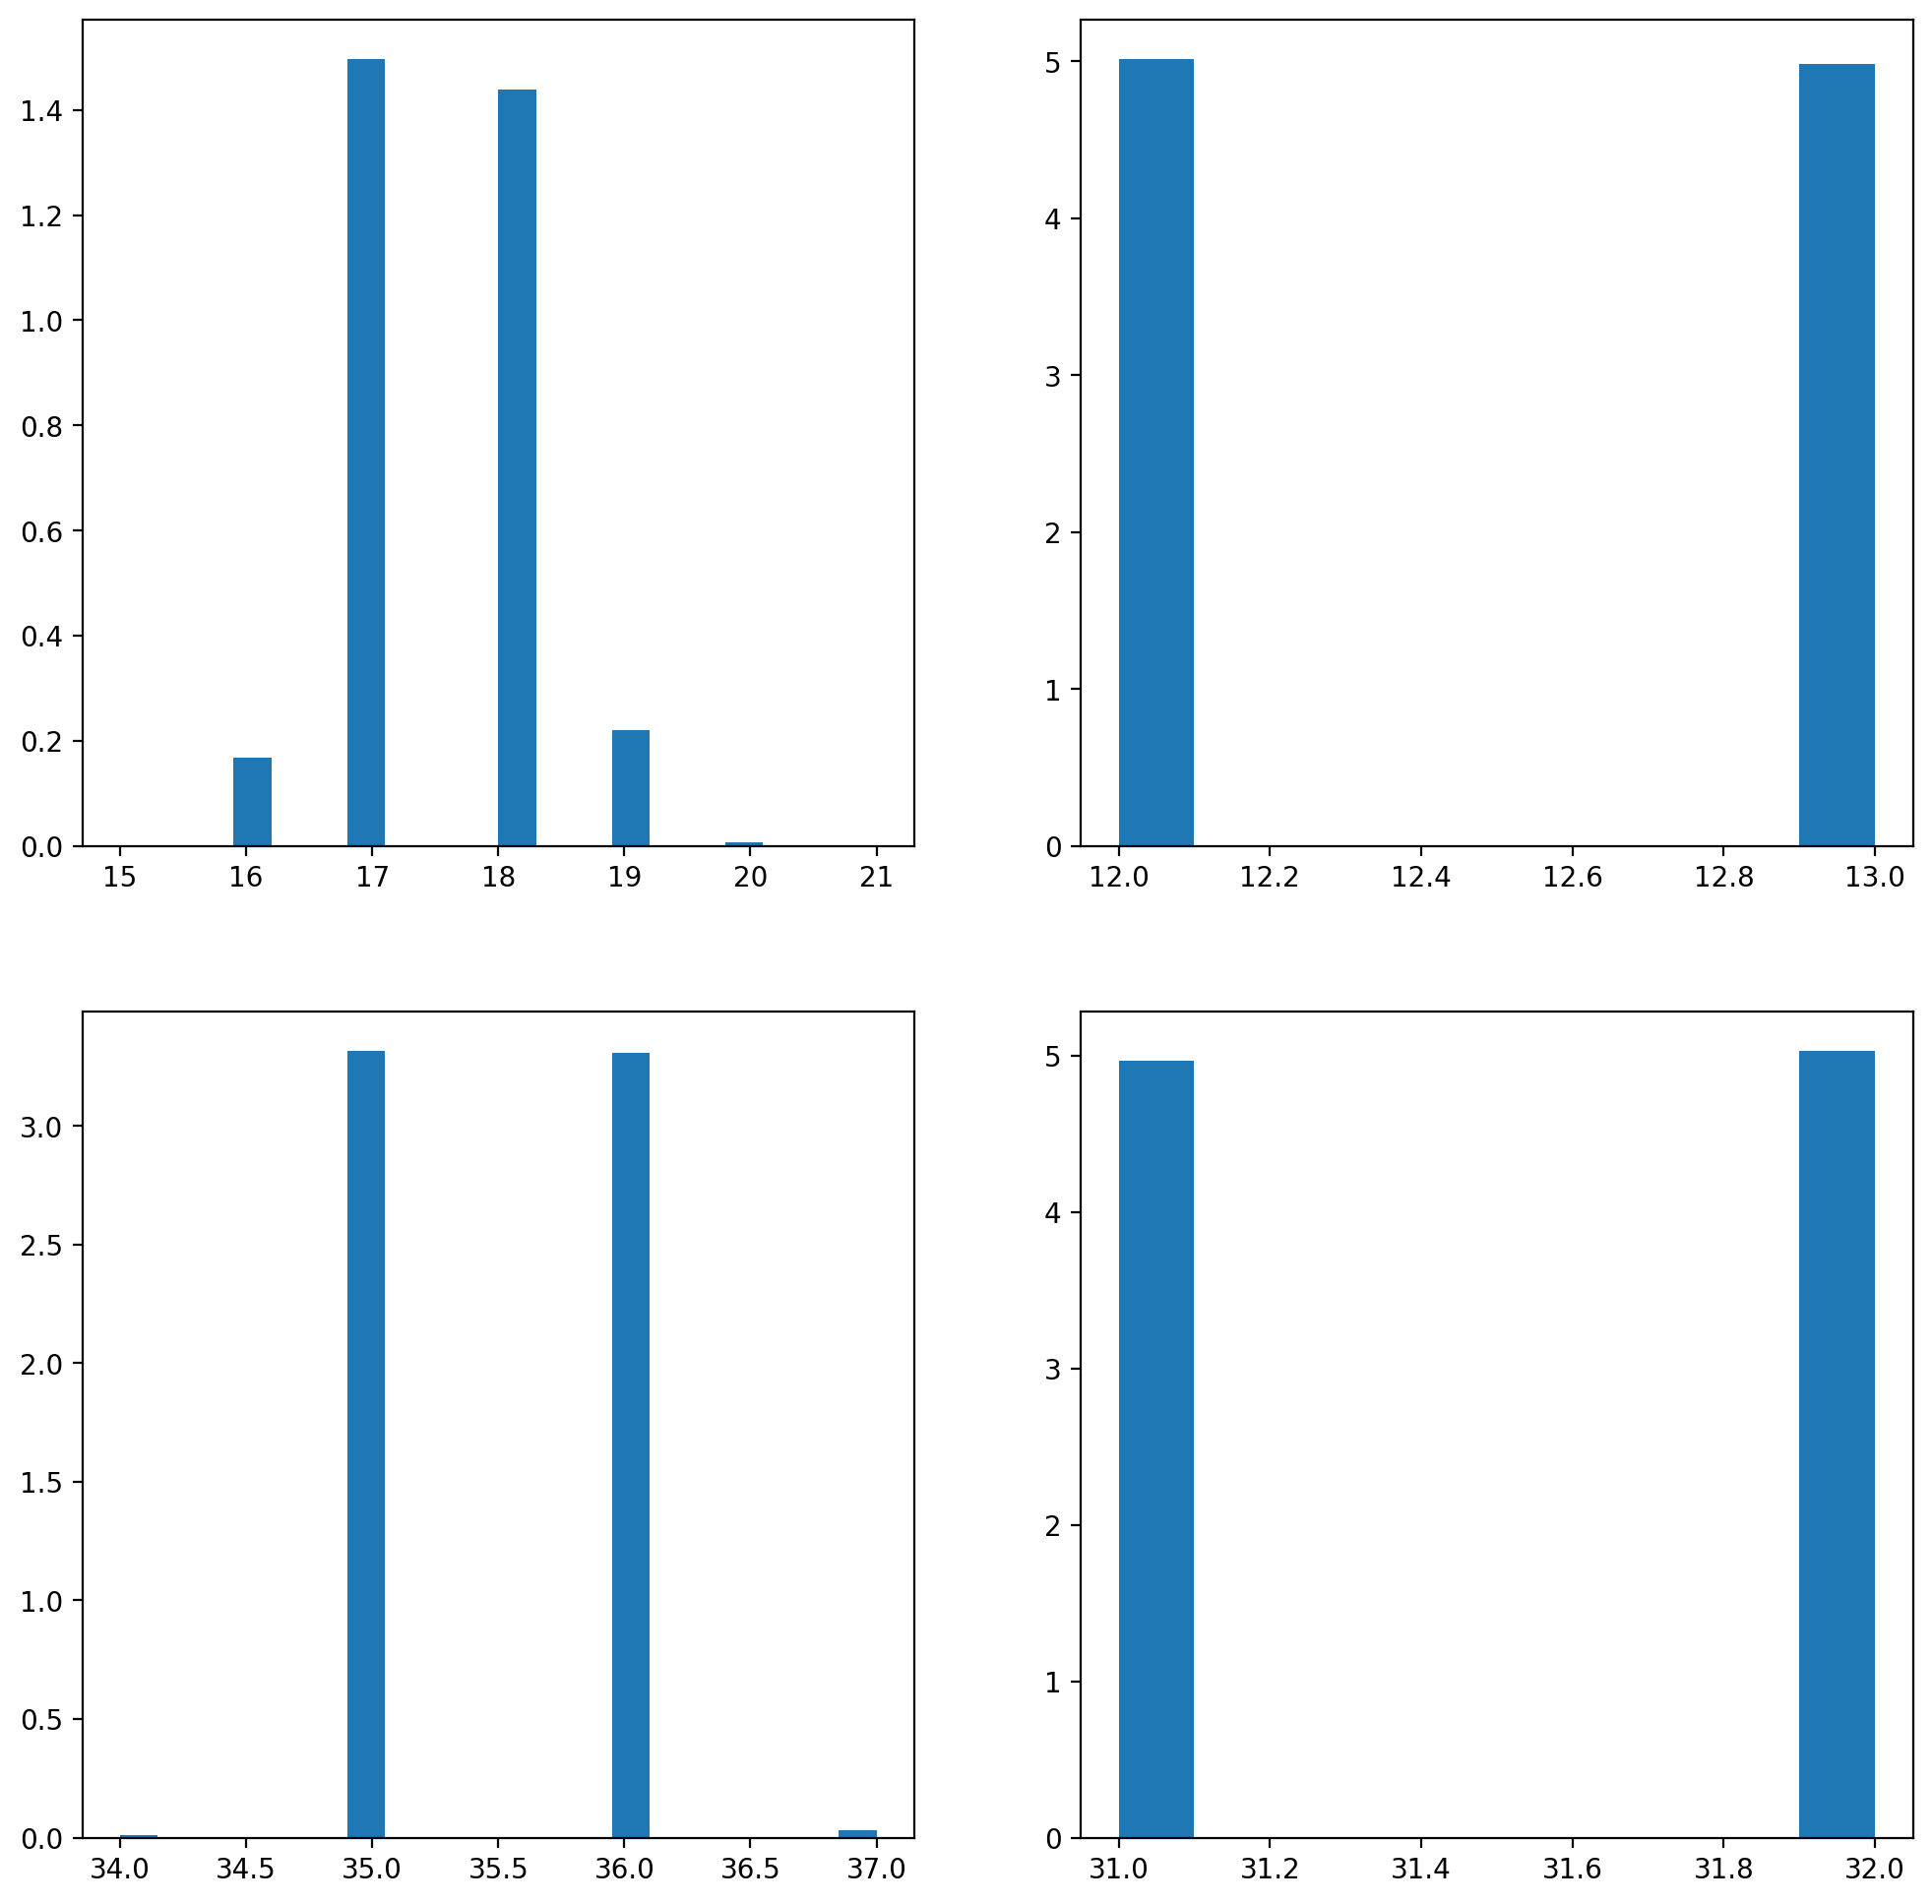

In [86]:
N_SAMPLES = 1000
SIZE = 32
MIN_QUALITY = 10
MAX_QUALITY = 90

MEAN =(MIN_QUALITY + MAX_QUALITY) / 100
STD = abs(MAX_QUALITY - MIN_QUALITY) / 200


def sample_quality(min_quality, max_quality):
    x = torch.zeros(SIZE, dtype=torch.float32)
    samples = []
    mean = np.log((max_quality - min_quality) / 100)
    std  = (max_quality - min_quality) / 1000

    for _ in range(N_SAMPLES):
        x.log_normal_(mean, std)
        y = torch.clip(min_quality + 10 * x, min_quality, max_quality).int()
        samples.extend(y)
    return samples


def sample_points(mean, std):
    x = torch.zeros(SIZE, dtype=torch.float32)
    samples = []
    mean = (max_quality - min_quality) / 100
    std  = (max_quality - min_quality) / 200

    for _ in range(N_SAMPLES):
        x.log_normal_(mean, std)
        y = torch.clip(10 * x, min_quality, max_quality).int()
        samples.extend(y)
    return samples

fig, axs = plt.subplots(2, 2, figsize=(12,12))
axs[0,0].hist(sample_quality(10,90), bins=20, density=True)
axs[0,1].hist(sample_quality(10,40), bins=10, density=True)
axs[1,0].hist(sample_quality(30,90), bins=20, density=True)
axs[1,1].hist(sample_quality(30,50), bins=10, density=True)
None

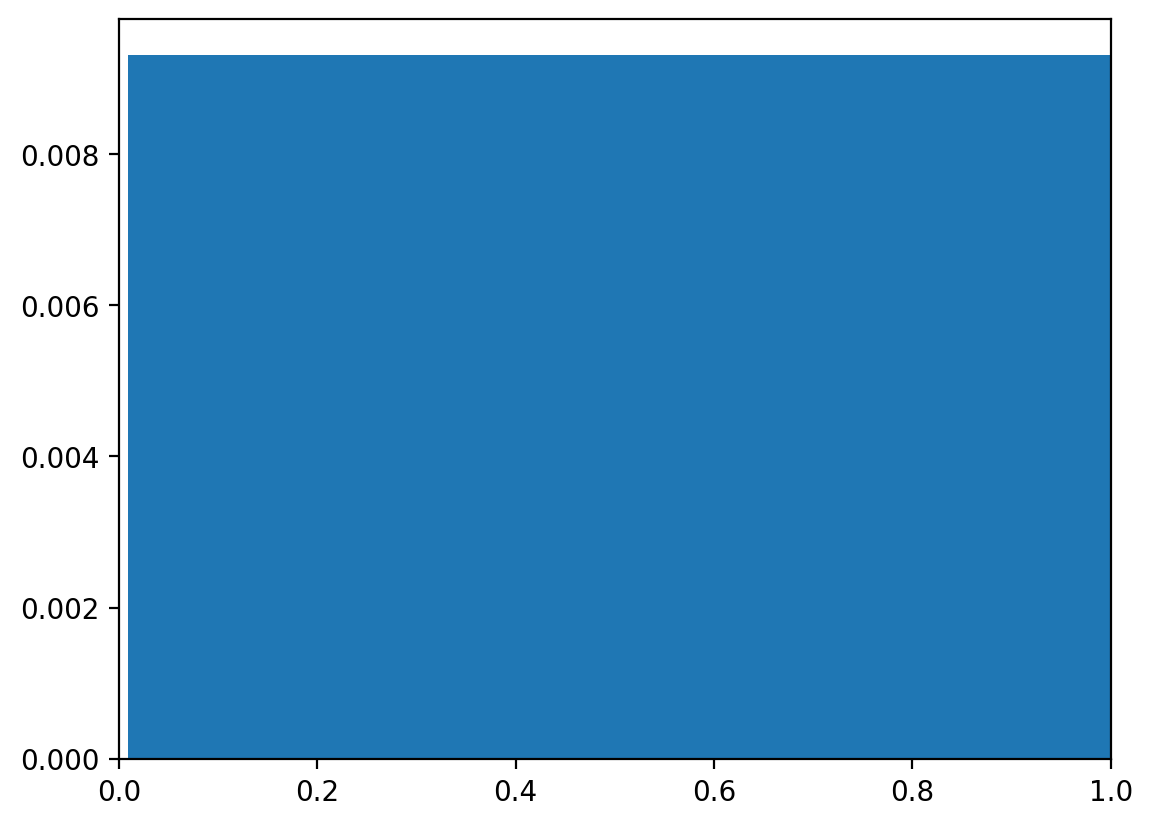

In [55]:
y = torch.zeros(N_SAMPLES * SIZE)
y.exponential_(0.25
              )
plt.hist(y, bins=100, density=True)
plt.gca().set_xlim(0, 1)
None

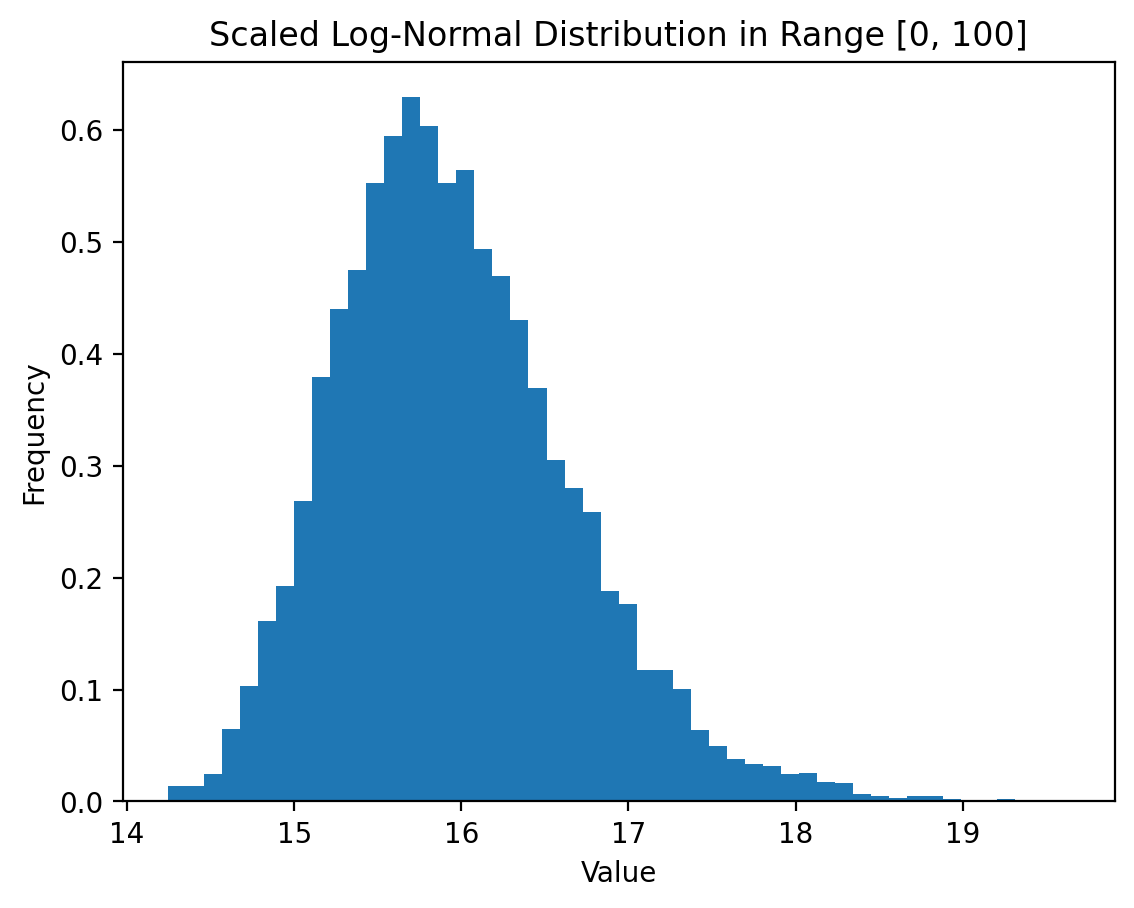

In [84]:
import torch
import matplotlib.pyplot as plt

# Step 1: Generate log-normal distributed samples
mean = 1.0
std_dev = 0.2
num_samples = 8000

# Sample from a normal distribution
normal_samples = torch.normal(mean, std_dev, size=(num_samples,))

# Transform to get log-normal distribution
log_normal_samples = torch.exp(normal_samples)

# Step 2: Normalize and scale the samples to the range [0, 100]
# Min-max normalization
min_val = 10
max_val = 90

# Scale to [0, 100]
scaled_samples = 100 * (min_val + log_normal_samples) / (max_val - min_val)

# Plot the histogram of the scaled samples
plt.hist(scaled_samples.numpy(), bins=50, density=True)
plt.title('Scaled Log-Normal Distribution in Range [0, 100]')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
None

tensor([ 4.9679, 51.2977, 56.9606, 42.7856, 20.2855, 46.4280, 60.7977, 76.9116,
        83.1720, 65.8336])


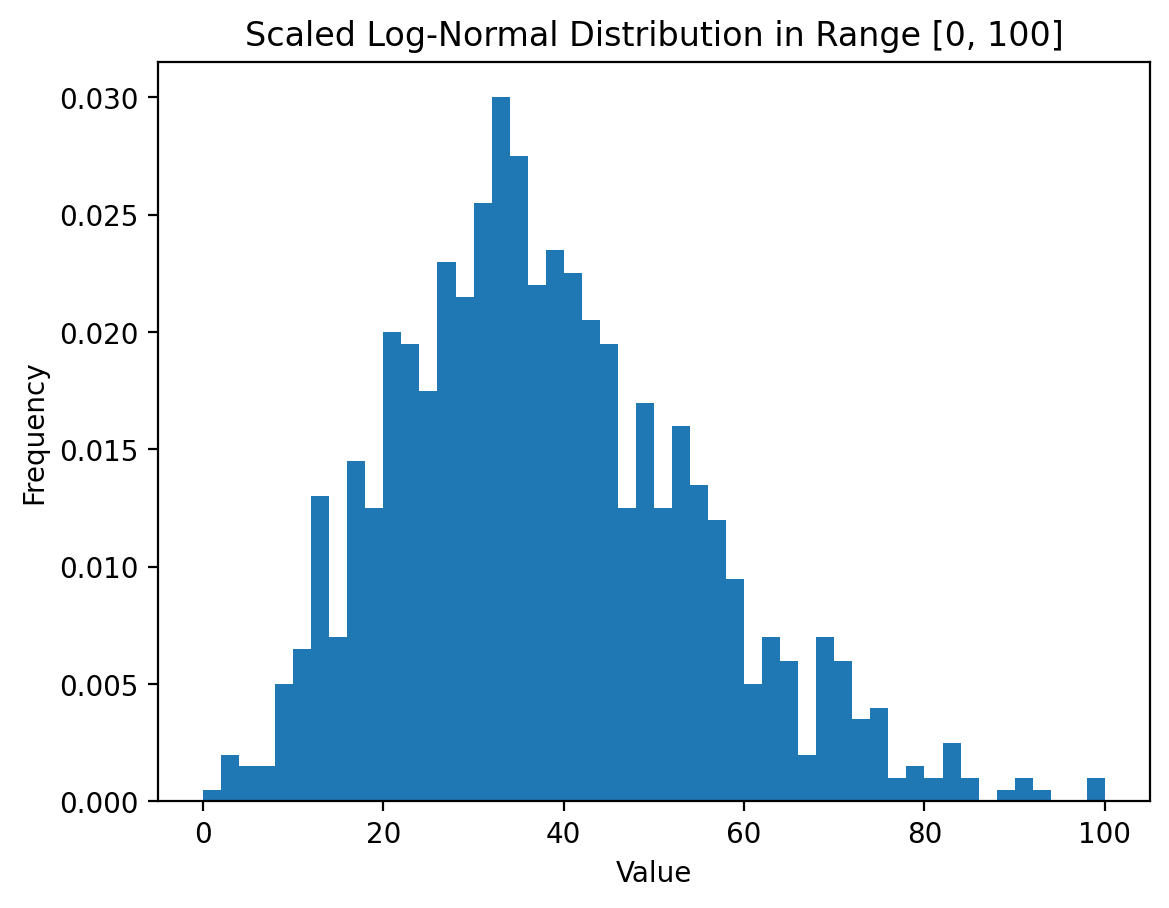

In [94]:
import torch
import matplotlib.pyplot as plt

# Parameters for the normal distribution to generate log-normal samples
mean = 10.0
std_dev = .2  # Increase this value to make the distribution more spread out
size = 1000

# Sample from the normal distribution
normal_samples = torch.normal(mean, std_dev, size=(size,))
log_normal_samples = torch.exp(normal_samples)

# Scale and shift to the range [0, 100]
min_val, max_val = 0, 100
scaled_samples = (log_normal_samples - log_normal_samples.min()) / (log_normal_samples.max() - log_normal_samples.min()) * (max_val - min_val) + min_val

# Clip the samples to ensure they are within the range [0, 100]
clipped_samples = torch.clamp(scaled_samples, min_val, max_val)

# Display the first few samples
print(clipped_samples[:10])

# Plot the histogram of the scaled and clipped samples
plt.hist(clipped_samples.numpy(), bins=50, density=True)
plt.title('Scaled Log-Normal Distribution in Range [0, 100]')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
None

In [95]:
def jpeg_quality_scaling(quality):
    if (quality <= 0):
        quality = 1
    if (quality > 100):
        quality = 100
    if (quality < 50):
        quality = 5000 / quality
    else:
        quality = 200 - quality * 2
    return quality

(10.0, 100.0)

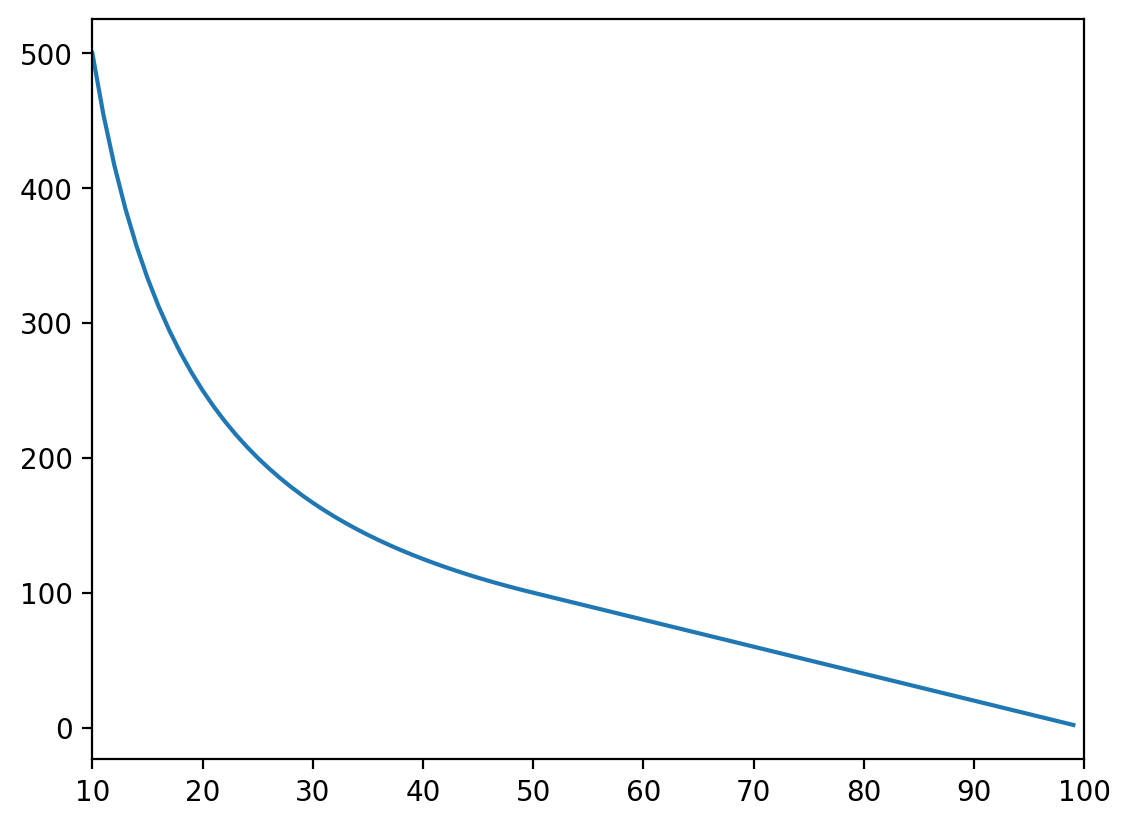

In [98]:
xs = np.arange(10, 100)
ys = [jpeg_quality_scaling(x) for x in xs]

plt.plot(xs, ys)
plt.xlim(10, 100)

In [101]:
z = np.random.choice(np.arange(10, 100), size=10_000, p=ys/np.sum(ys))

(array([468., 419., 389., 379., 317., 315., 291., 283., 265., 218., 219.,
        228., 210., 227., 194., 178., 170., 154., 152., 165., 172., 139.,
        154., 128., 142., 126., 130., 129., 113., 101., 112., 127., 115.,
        132.,  94., 104., 104., 119.,  90., 108.,  92.,  87.,  95., 102.,
          0.,  82.,  81.,  76.,  76.,  78.,  54.,  74.,  77.,  67.,  68.,
         67.,  62.,  60.,  51.,  63.,  46.,  62.,  54.,  58.,  47.,  53.,
         53.,  38.,  42.,  40.,  29.,  28.,  38.,  33.,  33.,  33.,  26.,
         27.,  18.,  23.,  18.,  21.,  20.,  16.,   8.,  16.,  15.,   5.,
          5.,   3.]),
 array([10.        , 10.97777778, 11.95555556, 12.93333333, 13.91111111,
        14.88888889, 15.86666667, 16.84444444, 17.82222222, 18.8       ,
        19.77777778, 20.75555556, 21.73333333, 22.71111111, 23.68888889,
        24.66666667, 25.64444444, 26.62222222, 27.6       , 28.57777778,
        29.55555556, 30.53333333, 31.51111111, 32.48888889, 33.46666667,
        34.44444444, 

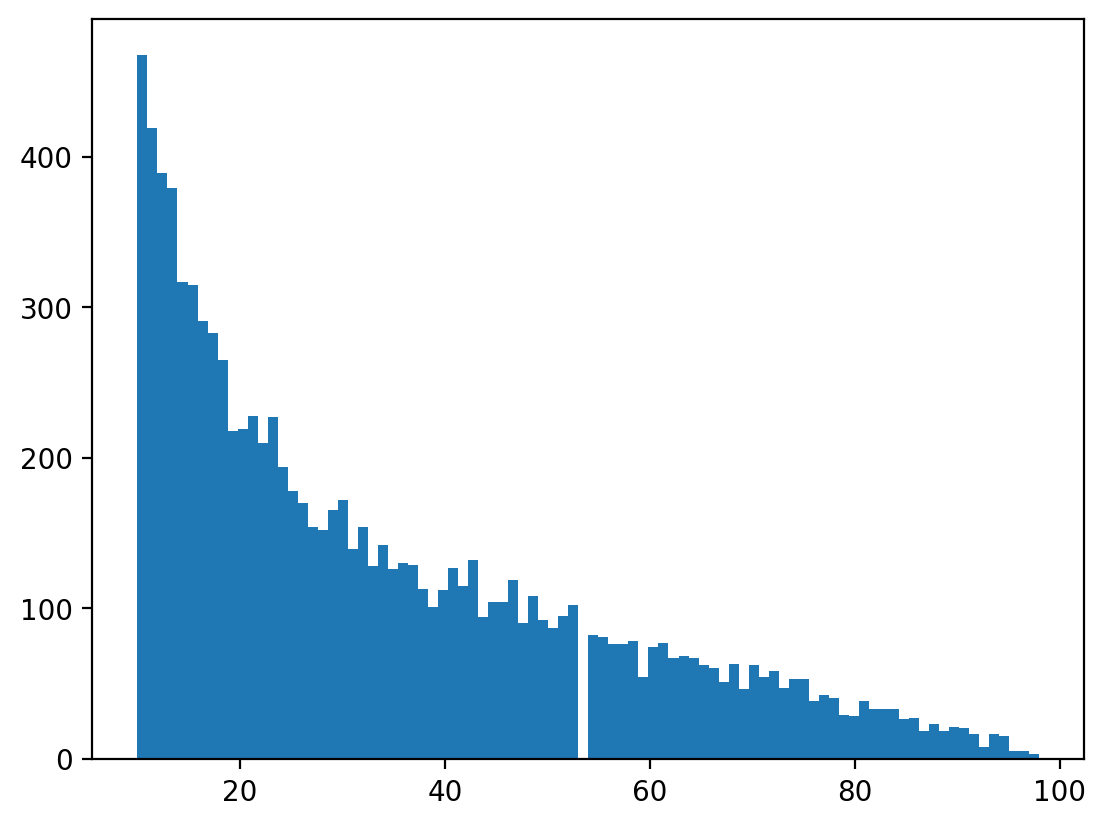

In [104]:
plt.hist(z, bins=90)